# Data Visualisation
© Copyright: 2024, Selma Hadzic, all rights reserved.

In [2]:
!pip install seaborn
!pip install plotly
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 2.8 MB/s eta 0:00:0000:0100:01


#### Restart the kernel: "Kernel" --> "Restart kernel"

## What is Seaborn ?

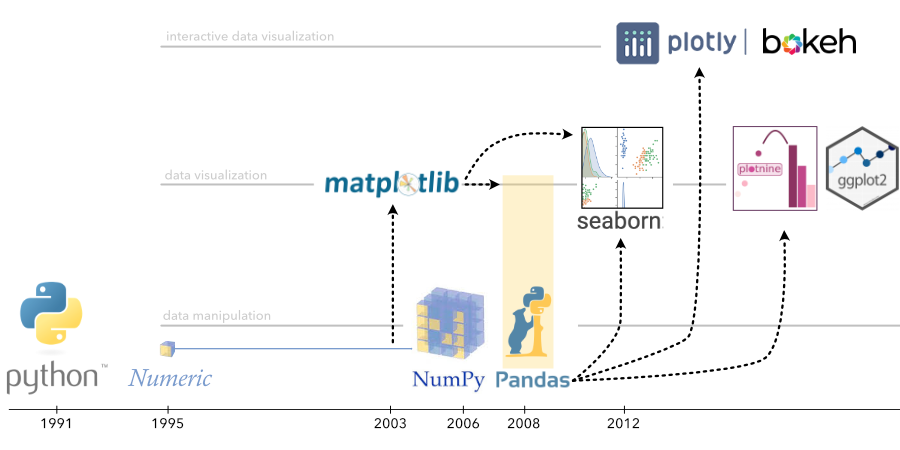

**Seaborn is a Python data visualization library based on Matplotlib.**

- It provides a high-level interface for drawing attractive and informative statistical graphics.
- It makes complex visualizations easy to produce with simple syntax.
- It also integrates well with Pandas DataFrames, making it a great choice for visualizing structured data.

[Seaborn API reference](https://seaborn.pydata.org/api.html)
[Setting styles](https://seaborn.pydata.org/generated/seaborn.set_style.html)

## 0. Load and read the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./data/nobel_final.csv")

In [11]:
# inspect the dataset
df.describe()

,year,share,age,age_get_prize
count,923.000000,923.000000,923.000000,923.000000
mean,1971.102925,2.020585,79.346696,59.823402
std,33.606425,0.943415,11.134606,12.571109
min,1901.000000,1.000000,23.000000,17.000000
25%,1947.000000,1.000000,73.000000,51.000000
50%,1977.000000,2.000000,80.000000,60.000000
75%,2000.000000,3.000000,87.500000,69.000000
max,2019.000000,4.000000,103.000000,97.000000


In [8]:
df.shape

(923, 14)

## Histograms

A histogram is a type of bar chart that represents the distribution of numerical data. 

- It shows how often data points fall within certain ranges (called bins).
- The height of each bar corresponds to the number of data points in each range, helping visualize the frequency of values in a dataset.

From the histogram we can derive the following information:
- are there any peak i.e. is one value more frequent than the others?
- is there a symmetry in the data?
- are there any particular outliers?

**Gaussian distribution**
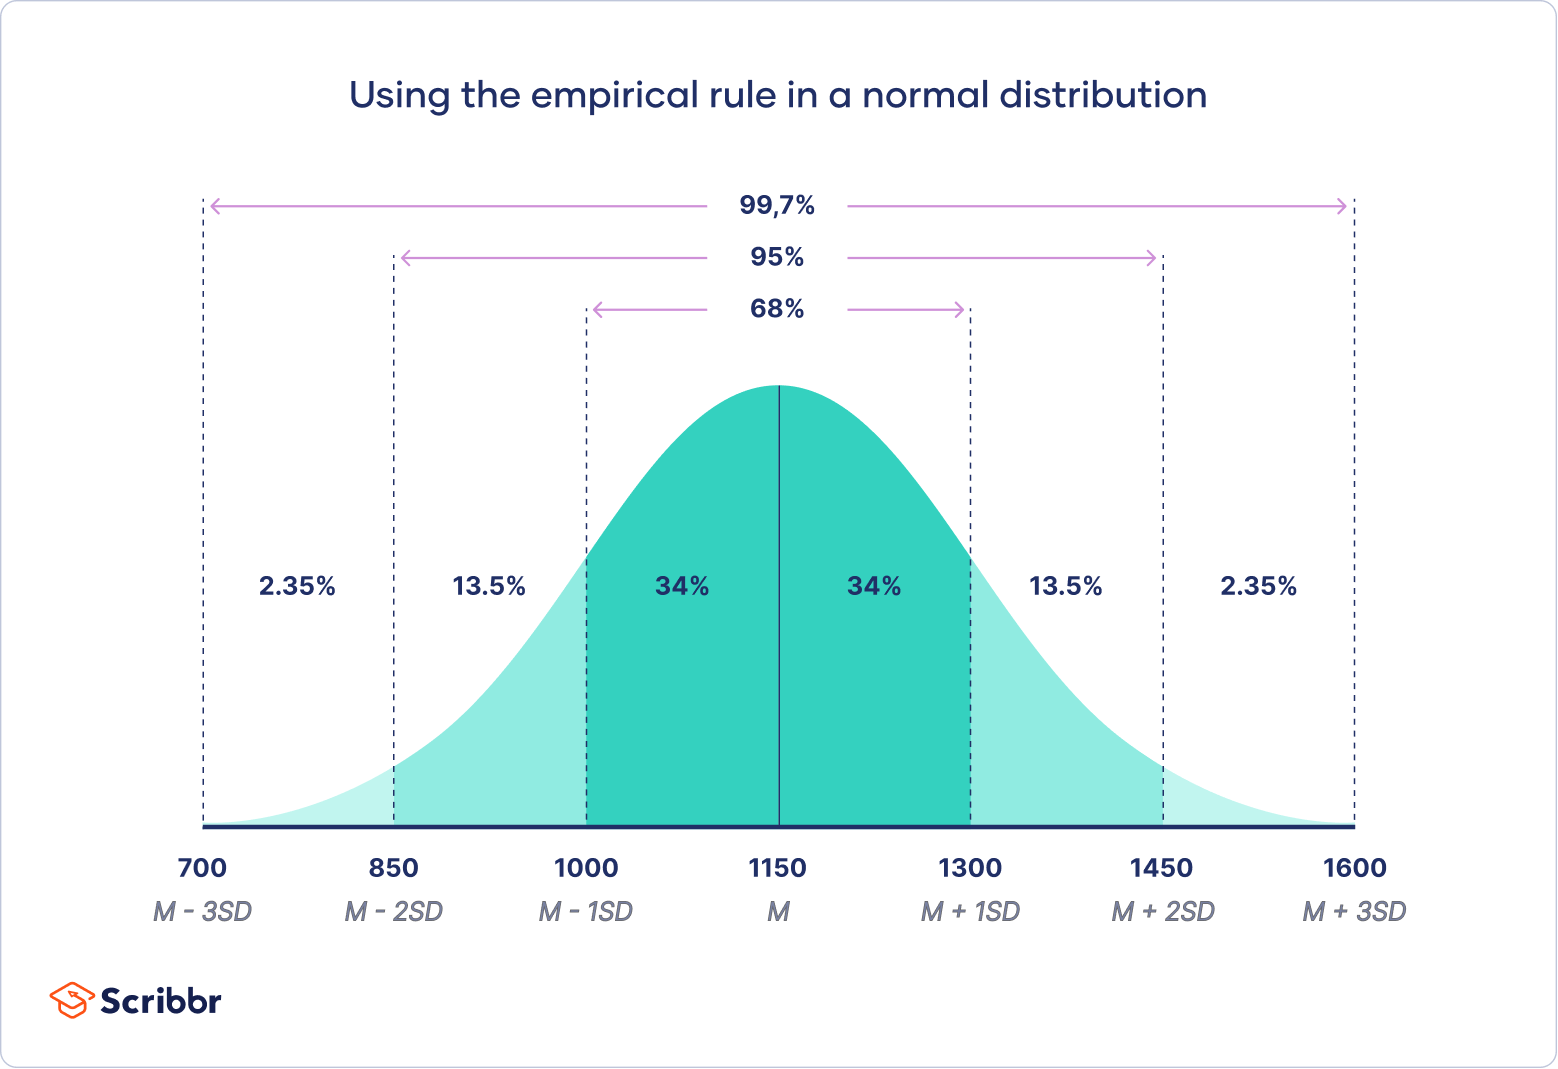

**Standard deviation**

<img alt="standard deviation" src="attachment:6720e76c-e7d5-4863-91a4-514795fd5134.jpg" width=300>

<br>

**Central limit theorem**
> The central limit theorem says that the sum or average of many independent copies of a random variable is approximately a normal random variable.

Orloff, Bloom (2017). Central Limit Theorem and the Law of Large Numbers. https://math.mit.edu/~dav/05.dir/class6-prep.pdf

### Q1: What is the age distribution of nobel prizes?

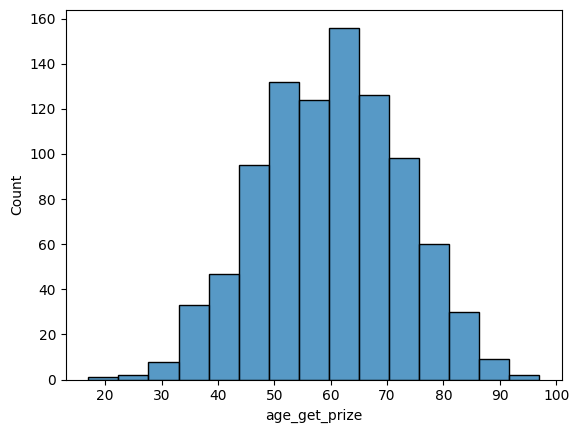

In [12]:
sns.histplot(x = 'age_get_prize', bins = 15, data= df);

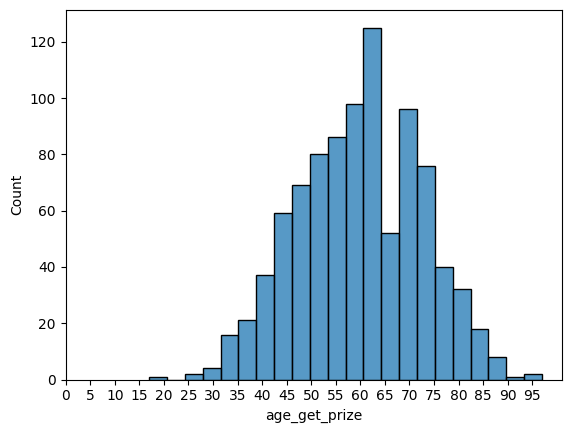

In [18]:
# To change the x-axis and show a tick every 5 years
sns.histplot(x = 'age_get_prize', data= df);
plt.xticks(range(0,100,5))
plt.show()

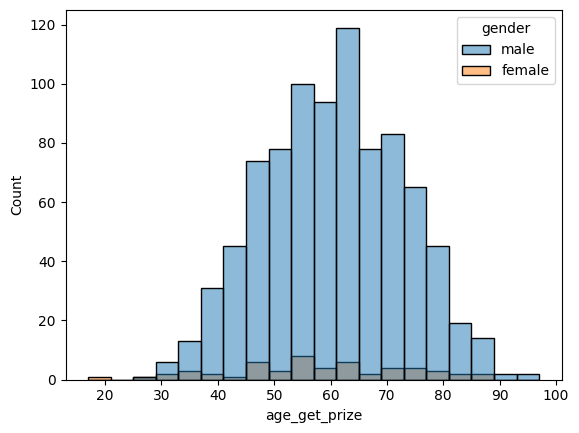

In [19]:
# Let's visualise the age distribution between genders
# Let's use the hue parameter
sns.histplot(x = 'age_get_prize', hue='gender', bins=20, data=df);

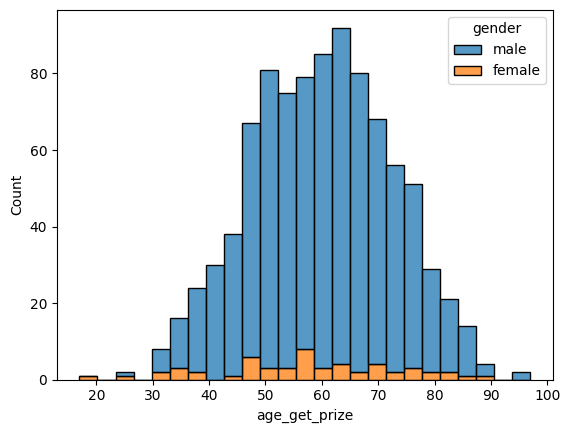

In [21]:
# To see them separately we are adding multiple parameter
sns.histplot(x = 'age_get_prize', hue = 'gender', bins = 25, multiple = 'dodge', data=df);

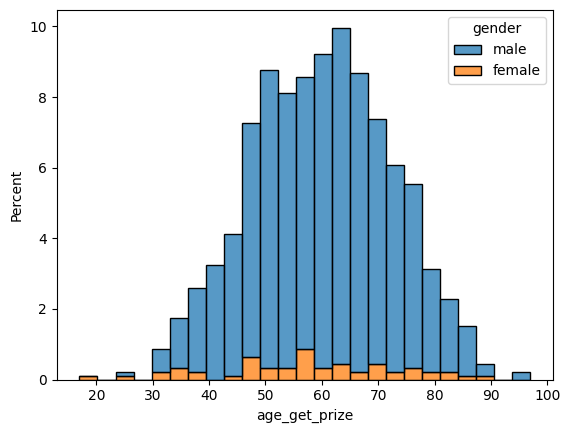

In [22]:
# We see count in y axis. But we can also change it with the stat parameter
sns.histplot(x = 'age_get_prize', hue = 'gender', bins = 25, stat = 'percent', multiple = 'stack', data=df);

### Q2: What is the distribution of age for each nobel category? 

### Box plots

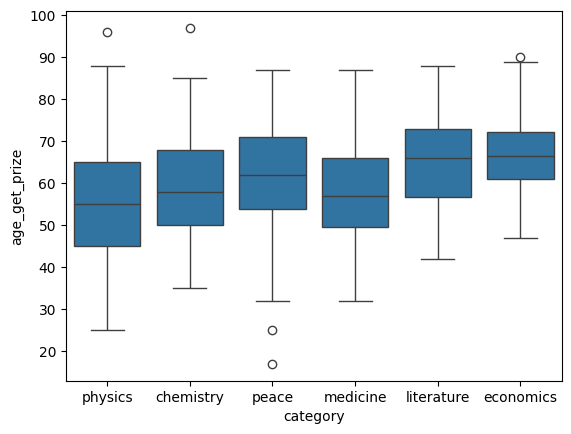

In [23]:
sns.boxplot(x = 'category', y='age_get_prize', data=df);

### What is a box plot ?

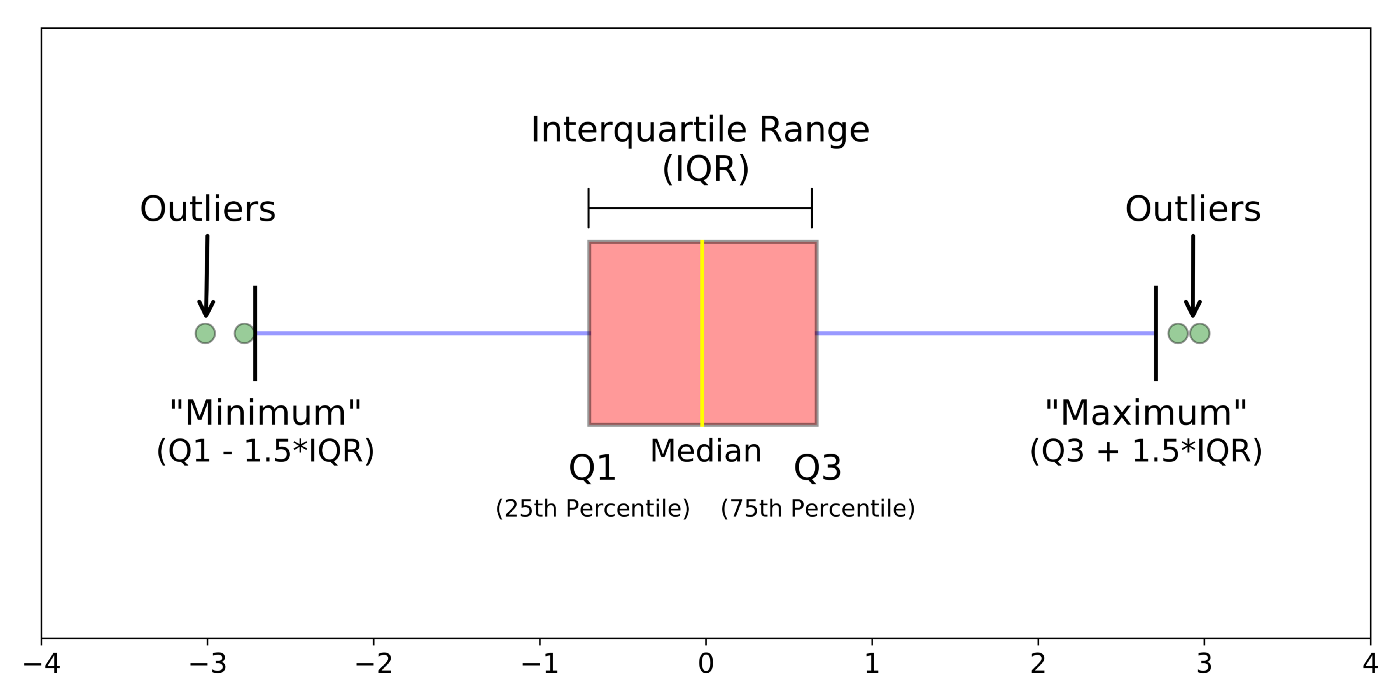

[source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

### Boxplots are a standardized way of displaying the distribution of data based on a five values summary:

####  <center>( 1. "Minimum", 2. First Quartile, 3. Median, 4. Third Quartile, 5. "Maximum" )</center>

- **Median** (Q2/50th percentile): The middle value of the dataset
- **First Quartile** (Q1/25th percentile): The middle value between the smallest value (not the "Minimum") and the median of the dataset
- **Third Quartile** (Q3/75th percentile): The middle value between the median and the highest value (not the "Maximum") of the dataset
- **Interquartile Range (IQR)**: 25th to the 75th percentile
- **Whiskers** (blue lines)
- **Outliers** (green circles)
- **"Maximum"**: Q3 + 1.5*IQR
- **"Minimum"**: Q1 -1.5*IQR


### Q3: Do Nobel Prize laureate from different nobel category have different age?

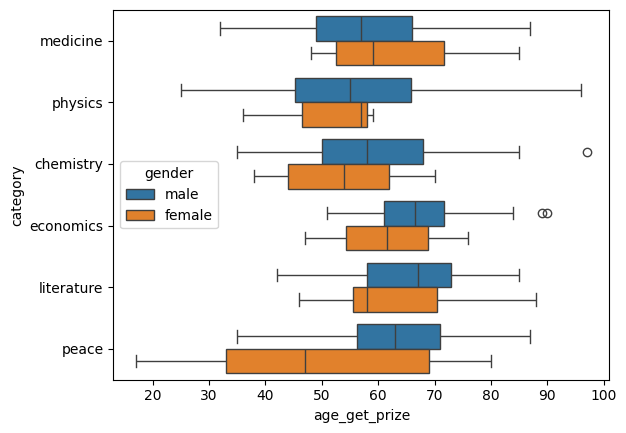

In [27]:
sns.boxplot(y = 'category', x = 'age_get_prize',
            order = ['medicine', 'physics', 'chemistry', 'economics', 'literature', 'peace'],
            hue = 'gender',
            data=df
           );

## Bar Plot

It plots numeric values for levels of a categorical feature as bars. Each bar represents one categorical value, and the length of each bar corresponds to the bar’s value.

### Q4: What is the average age for each prize category?

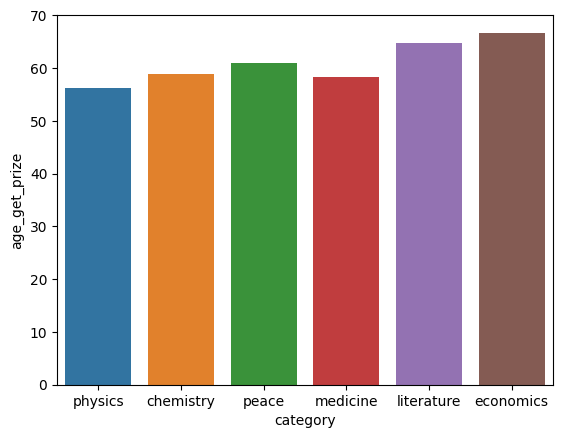

In [30]:
# By default, the bar's value is the mean
sns.barplot(x = 'category', y= 'age_get_prize', errorbar= None, hue="category", data=df);
# confidence interval: one way to represent how "good" our estimate is

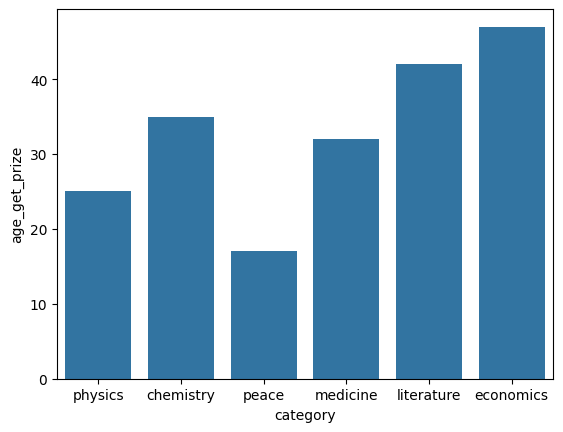

In [31]:
# We can also change the estimator by which to display the values
import numpy as np
sns.barplot(x ="category", y="age_get_prize", errorbar= None, estimator= np.min, data=df);

## Scatterplots

[Dataset source](https://www.kaggle.com/datasets/taweilo/taiwan-wright-and-weight-sampling-data)

In [32]:
bmi = pd.read_csv("./data/Taiwan_2017_2020_bmi.csv")

In [33]:
bmi.head()

,yr,height,weight,bmi,gender
0,0,69.96,10.29,21.02,Male
1,0,71.69,10.89,21.19,Male
2,0,68.54,10.93,23.27,Male
3,0,69.69,9.38,19.31,Male
4,0,71.30,7.93,15.59,Male


$$ bmi = \frac{Weight (kgs)}{[Height (m)]^2}$$


### Q5: What is the link between the weight and the height of a person?

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='bmi', hue = 'yr', data=bmi).set(title = 'Are taller people heavier?')



ValueError: invalid literal for int() with base 10: '19-44'

## Seaborn's palettes
[Tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html)

[List of all seaborn palettes](https://www.reddit.com/r/visualization/comments/qc0b36/all_seaborn_color_palettes_together_so_you_dont/)

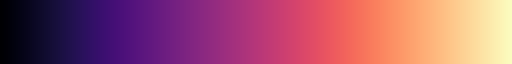

In [43]:
sns.color_palette("magma", as_cmap=True)

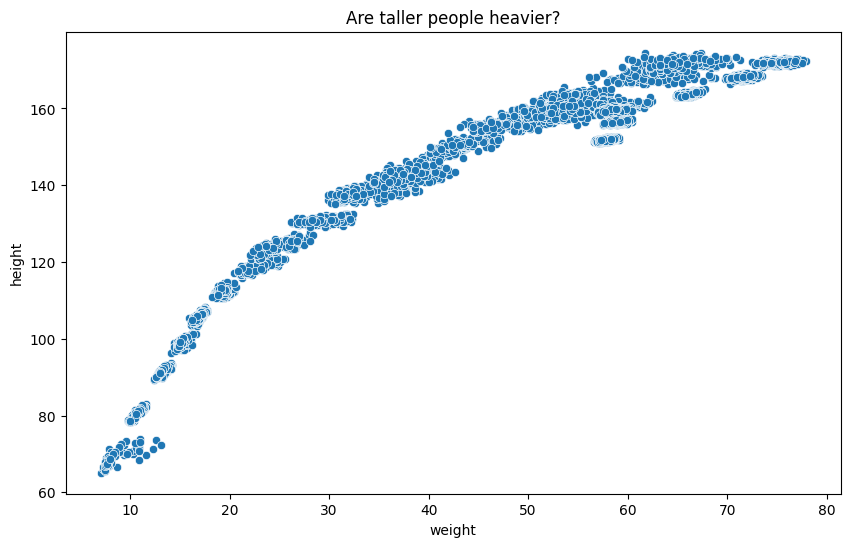

In [44]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='weight', y='height', data=bmi, ).set(title='Are taller people heavier?');

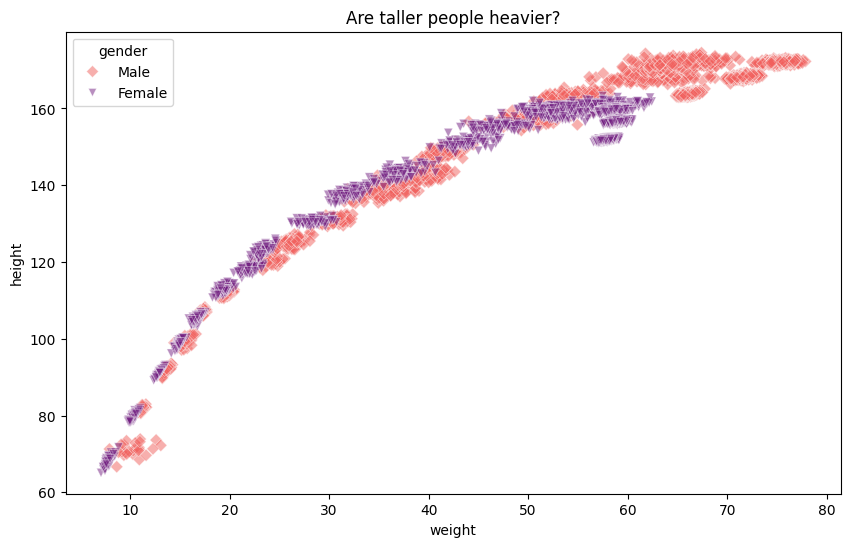

In [45]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='weight', y='height', data=bmi, hue='gender',
                palette='magma_r', 
                s=40, 
                style='gender', 
                alpha = 0.5, 
                markers = ['D','v']).set(title='Are taller people heavier?');

# s: marker size
# alpha: blending value, between 0 (transparent) and 1 (opaque).

# other possible markers:
# '.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X'

## Interactive visualisation

List of online resources: 
> https://plotly.com/  # commercial page   
> https://plotly.com/graphing-libraries/  # open source graphing libraries  
> https://plotly.com/python/ # Library for Python  
> https://plotly.com/python/plotly-express/  # plotly express  
> https://plotly.com/python-api-reference/ # plolty for python documentation   
> https://plotly.com/python/reference/index/ # documentation for figure manipulations  

In [46]:
import plotly.express as px
import plotly.io as pio
 
pio.renderers.default = 'notebook' 

In [48]:
color_map = {
    'Male': 'purple',    # Set color for Male
    'Female': 'green'   # Set color for Female
}

fig = px.scatter(
    bmi, 
    x='yr', 
    y='height', 
    size='weight', 
    color='gender',
    title="Height vs. Year with Weight and Gender",
    labels={'yr': 'Age', 'height': 'Height (cm)', 'weight': 'Weight (kg)', 'gender': 'Gender'},
    color_discrete_map=color_map
)

fig.show(renderer="browser")

## Maps
You can also create maps with plotly
https://plotly.com/python/scattermapbox/